In [109]:
import numpy as np
import pandas as pd
import sklearn
import autograd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler


In [110]:
Macro=pd.read_csv('macro - CPIAUCSL.csv')

In [111]:
print(Macro)

print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

print('Variables are as follows:')
print('DATE=date in dd/m/yy format,')
print('CPIAUCSL= consumer price index for all urban consumers (US),')
print('BUSLOANS=business loan rate (US),')
print('GDPC1= real GDP (US),')
print('FEDFUNDS= federal funds rate,')
print('UNRATE= unemployment rate,')
print('R/D= binary variable for government of day {1=republican, 0=democratic}')


print('~~~~~~Data sourced from FRED~~~~~~~')

          DATE  CPIAUCSL   BUSLOANS    GDPC1  FEDFUNDS  UNRATE  R/D
0     7/1/1954    26.840    22.4539   2559.4      1.03     6.0    1
1    10/1/1954    26.757    22.6042   2609.3      0.99     5.3    1
2     1/1/1955    26.793    22.9938   2683.8      1.34     4.7    1
3     4/1/1955    26.757    23.7303   2727.5      1.50     4.4    1
4     7/1/1955    26.777    24.9522   2764.1      1.94     4.1    1
5    10/1/1955    26.857    26.3037   2780.8      2.36     4.2    1
6     1/1/1956    26.860    27.7863   2770.0      2.48     4.0    1
7     4/1/1956    27.037    29.7260   2792.9      2.69     4.2    1
8     7/1/1956    27.317    31.0853   2790.6      2.81     4.1    1
9    10/1/1956    27.550    32.2078   2836.2      2.93     4.1    1
10    1/1/1957    27.777    32.8057   2854.5      2.93     3.9    1
11    4/1/1957    28.013    33.6938   2848.2      3.00     4.1    1
12    7/1/1957    28.263    34.5061   2875.9      3.23     4.2    1
13   10/1/1957    28.400    34.2125   2846.4    

## I want to perform principle component analysis on the quantitative variables here

## I really need to normalise the data to account for difference in units of measurement and magnitude

## PCA is a way of taking (potentially correlated) variables   and to represent them in in space as linerally uncorrelated vectors (principle components) in order of amount of variance explained.

In [133]:
Macro=Macro.ix[:,Macro.columns!= 'DATE'] #remove non-quantitative variables (date)

rescaledX = (Macro - Macro.mean()) / Macro.std()
#This normalises the data

MacroX=pd.DataFrame(rescaledX) #this is rescaled data: between 0 and 1
MacroX.columns=['CPIAUCSL','BUSLOANS','GDPC1','FEDFUNDS','UNRATE','R/D']

In [134]:
pca=PCA(n_components=3) #somewhat arbitrary. Could make a cutoff point (<5% explained)
pca.fit(MacroX)

PCA(copy=True, n_components=3, whiten=False)

In [135]:
PC1 = np.array(pca.components_[0])
PC2 = np.array(pca.components_[1])
PC3 = np.array(pca.components_[2])

print('Variance explained  by principle components is:', pca.explained_variance_ratio_) 

Variance explained  by principle components is: [ 0.538  0.193  0.14 ]


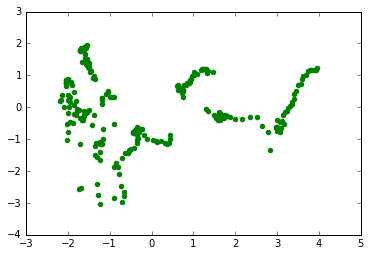

In [160]:
TranfX=pca.transform(MacroX)

plt.scatter(TranfX[:,0],TranfX[:,1], color=)

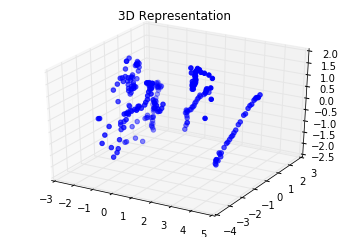

In [148]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(TranfX[:,0],TranfX[:,1],TranfX[:,2],color=)
plt.title('3D Representation')

## Each PC is a linear combination of our variables:

$PC_{j}= \beta_{1}^{j}X_{1}+\beta_{2}^{j}X_{2}+...+\beta_{k}^{j}X_{k}$ 

## for k variables (6 in our case)

In [138]:
#Returning coefficients of principle component 

i = np.identity(MacroX.shape[1])  # identity matrix
i

coef=pca.transform(i)
coef

pd.DataFrame(coef, columns=['PC-1', 'PC-2','PC-3'], index=MacroX.columns)

,PC-1,PC-2,PC-3
CPIAUCSL,0.542819,-0.124651,0.086928
BUSLOANS,0.543103,-0.036021,0.116580
GDPC1,0.542091,-0.083285,0.129608
FEDFUNDS,-0.282507,-0.418017,-0.021752
UNRATE,0.117228,-0.660094,-0.676102
R/D,-0.151561,-0.604786,0.710258


# Analysing the components:

## PC1 has CPIAUCSL, BUSLOANS and GDPC1 as important factors. The other 3 are less represented here. PC1 represents ~53% of the total variation.

## PC2 has UNRATE and R/D as the most important factors, followed by FEDFUNDS. This PC represenst ~19% of total variation explained

## PC3 has R/D as a very important factor. PC3 represents ~14% of total variation explained.

In [141]:
np.linalg.norm(coef,axis=0) #this confirms that the principle components 
                            #indeed have a variance of 1- just making sure 
                            #being valid here

array([ 1.,  1.,  1.])